# **WEB AND SOCIAL MEDIA ANALYTICS**

---


**MOUNTING GDRIVE WITH COLAB**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**CHECKING FOR FILES IN DRIVE**

In [ ]:
!ls /content/gdrive/MyDrive/'Web_and_social_media_analytics '

'Brands and Asins.csv'			     neg_words.txt
 Cell_Phones_and_Accessories_5.csv	     phone_data_final.csv
 data.csv				     phone_reviews.csv
 final.csv				     positive_corpus.xlsx
 final_tab.xlsx				     pos_sentiment_word.csv
 for_tableau.xlsx			     pos_words.txt
 meta_Cell_Phones_and_Accessories-001.json   Presentation1.pptx
 meta_Cell_Phones_and_Accessories.json	     review.csv
 meta_Cell_Phones_and_Accessories.json.gz    review_sentiment.csv
 meta.csv				     stop_words_long.txt
 negative_corpus.xlsx			    'Tableau_web&social.twb'
 neg_sentiment_word.csv			    'Tableau_web&social.twbx'


In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file 'meta_cell_phones_and_Accessories' is the folder name under 'My Drive'
path1 = '/content/gdrive/MyDrive/Web_and_social_media_analytics /meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/gdrive/MyDrive/Web_and_social_media_analytics /meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries.
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [ ]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [ ]:
#creating new .csv file for meta
df_meta.to_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /meta.csv',escapechar='/')

In [ ]:
#reading meta.csv file
df_meta = pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /meta.csv')

<ipython-input-9-8e56fd525141>:2: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /meta.csv')


In [ ]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /Cell_Phones_and_Accessories_5.csv')

<ipython-input-10-50ad9915992e>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_phonedata = pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /Cell_Phones_and_Accessories_5.csv')


In [ ]:
df_meta.shape

(590071, 19)

In [ ]:
df_phonedata.shape

(1128437, 12)

**Data pre-processing**

In [ ]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [ ]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE,2014-02-11
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE,2014-02-07
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE,2014-02-03
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE,2014-02-02


In [ ]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
 12  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 104.4+ MB


In [ ]:
df_phonedata.isnull().sum()

overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            156
reviewText              768
summary                 525
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
Date&Time                 0
dtype: int64

In [ ]:
# dropping image column as it's not needed
df_phonedata.drop(['image'], axis = 1, inplace = True)

In [ ]:
#Replacing na values
df_phonedata['reviewText'].replace('', np.nan, inplace=True)
df_phonedata.dropna(subset=['reviewText'], inplace=True)

df_phonedata['summary'].replace('', np.nan, inplace=True)
df_phonedata.dropna(subset=['summary'], inplace=True)

df_phonedata['reviewerName'].replace('', np.nan, inplace=True)
df_phonedata.dropna(subset=['reviewerName'], inplace=True)

df_phonedata['style'].replace('', np.nan, inplace=True)

df_phonedata['vote'].replace('', np.nan, inplace=True)


In [ ]:
#Fill na with bfill method
df_phonedata = df_phonedata.fillna(method ='bfill')

In [ ]:
# Dropping null valus from style and vote
df_phonedata.dropna(subset=['style'], inplace=True)
df_phonedata.dropna(subset=['vote'], inplace=True)

In [ ]:
len(df_phonedata)

1126801

In [ ]:
df_phonedata.isnull().sum()

overall             0
verified            0
reviewerID          0
asin                0
style               0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote                0
review_sentiment    0
Date&Time           0
dtype: int64

In [ ]:
df_phonedata.describe()

,overall,unixReviewTime
count,1.126801e+06,1.126801e+06
mean,4.221208e+00,1.440366e+09
std,1.231933e+00,4.568975e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444262e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


In [ ]:
df_meta.head(5)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,0,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,Trollies Sing a Long Party VHS,[],[],NaN,NaN,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,NaN,NaN,NaN,6303195164
1,1,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,La Pura VHS,[],[],NaN,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,NaN,NaN,NaN,630524412X
2,2,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['New items to give you a new good mood, welco...",NaN,Leopard Thanksgiving Easter PC Black Case for ...,[],[],NaN,NaN,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,NaN,NaN,NaN,6310200240
3,3,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,Puppies Faceplate Hard Case Protector for Net1...,[],[],NaN,Live2Pedal,['Protect your phone with style through this A...,"['>#6,368,825 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501710
4,4,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['A brand-new, unused, unopened, undamaged ite...",NaN,White Wolf Faceplate Protector Hard Case for S...,[],[],NaN,wirelessoutletusa,['Protect your phone with style through this A...,"['>#2,672,454 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,6786501273


In [ ]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    590071 non-null  int64 
 1   category      590071 non-null  object
 2   tech1         6585 non-null    object
 3   description   590071 non-null  object
 4   fit           43 non-null      object
 5   title         590062 non-null  object
 6   also_buy      590071 non-null  object
 7   image         590071 non-null  object
 8   tech2         231 non-null     object
 9   brand         577357 non-null  object
 10  feature       590071 non-null  object
 11  rank          590071 non-null  object
 12  also_view     590071 non-null  object
 13  details       590071 non-null  object
 14  main_cat      586685 non-null  object
 15  similar_item  50931 non-null   object
 16  date          45880 non-null   object
 17  price         127564 non-null  object
 18  asin          590071 non

In [ ]:
df_meta.shape

(590071, 19)

In [ ]:
df_meta.isnull().sum()

Unnamed: 0           0
category             0
tech1           583486
description          0
fit             590028
title                9
also_buy             0
image                0
tech2           589840
brand            12714
feature              0
rank                 0
also_view            0
details              0
main_cat          3386
similar_item    539140
date            544191
price           462507
asin                 0
dtype: int64

In [ ]:
df_meta['category'] = df_meta['category'].astype(str)
df_meta = df_meta[df_meta.category.str.contains("'Cell Phones'")]

In [ ]:
#Drop duplicates
df_meta = df_meta.loc[df_meta.astype(str).drop_duplicates().index]

In [ ]:
df_meta['category1'] = [L[2:13] if len(L) > 0 else np.nan for L in df_meta['category']]

In [ ]:
df_meta = df_meta[df_meta['category1'] == 'Cell Phones']

In [ ]:
#Dropping Category column
df_meta.drop(['category'], axis=1, inplace=True)

In [ ]:
#Dropping Unnamed: 0 column
df_meta.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
#Checking for duplicates in asin
len(df_meta[df_meta.duplicated('asin')])

34

In [ ]:
df_meta.drop_duplicates('asin', inplace = True)

In [ ]:
df_meta.shape

(9789, 18)

In [ ]:
df_meta.isnull().sum()

tech1           9758
description        0
fit             9789
title              0
also_buy           0
image              0
tech2           9780
brand            123
feature            0
rank               0
also_view          0
details            0
main_cat          14
similar_item    6856
date            9553
price           8046
asin               0
category1          0
dtype: int64

In [ ]:
df_meta.drop(['tech1','tech2','fit','date','similar_item'], axis = 1, inplace = True) #dropping columns with null values in meta

In [ ]:
# checking the brand wise null value
df_meta[df_meta["price"].isnull()]['brand'].value_counts()

Samsung         1196
LG               612
Motorola         585
Nokia            448
BLU              440
                ... 
Social Drive       1
MYSAGA             1
GoPro              1
LSoug              1
BEISTE             1
Name: brand, Length: 871, dtype: int64

In [ ]:
# impute null where price having descriptive text
df_meta["price"]=[np.nan if len(str(x))>15 else x for x in df_meta["price"]]
df_meta['price'].replace('', np.nan, inplace=True)
df_meta['price'].replace( np.nan, '0.0', inplace=True)

In [ ]:
df_meta['price'].value_counts()

0.0        8092
$40.08      133
$27.57      129
$16.00       44
$49.99       38
           ... 
$159.06       1
$82.00        1
$272.98       1
$37.28        1
$75.24        1
Name: price, Length: 723, dtype: int64

In [ ]:
df_meta.isnull().sum()

description      0
title            0
also_buy         0
image            0
brand          123
feature          0
rank             0
also_view        0
details          0
main_cat        14
price            0
asin             0
category1        0
dtype: int64

In [ ]:
# checking the brand wise null value
df_meta[df_meta["price"].isnull()]['brand'].value_counts()

Series([], Name: brand, dtype: int64)

In [ ]:
# replace $ to none and convert price to float
df_meta["price"]= df_meta["price"].str.replace("$",'')

<ipython-input-44-6526b3600540>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_meta["price"]= df_meta["price"].str.replace("$",'')


In [ ]:
# converting price column from object dtype to numeric
df_meta['price']= pd.to_numeric(df_meta['price'], errors='coerce')

In [ ]:
df_meta['price'].value_counts()

0.00      8092
40.08      133
27.57      129
16.00       44
49.99       38
          ... 
159.06       1
82.00        1
272.98       1
37.28        1
75.24        1
Name: price, Length: 719, dtype: int64

In [ ]:
df_meta.brand.value_counts()

Samsung         1639
LG               834
Motorola         681
Nokia            577
HTC              478
                ... 
Social Drive       1
MYSAGA             1
GoPro              1
LSoug              1
BEISTE             1
Name: brand, Length: 906, dtype: int64

In [ ]:
# also dropping main_cat and image
df_meta.drop(['main_cat','image'], axis=1, inplace=True)

In [ ]:
# removing null from brand and price
df_meta = df_meta[~df_meta['brand'].isnull()]
df_meta = df_meta[~df_meta['price'].isnull()]

In [ ]:
# extracting rank in cellphones and acessories
df_meta["new_rank"]=df_meta["rank"].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]


In [ ]:
df_meta["new_rank"]=df_meta["new_rank"].str.replace(">#","").str.replace("in Cell Phones & Accessories","").str.replace(",","")


In [ ]:
# converting new rank column to integer
df_meta["new_rank"] = df_meta["new_rank"].astype("float")


In [ ]:
df_meta = df_meta[~df_meta['new_rank'].isnull()]


In [ ]:
# dropping rank column as we got new_rank column
df_meta.drop(["rank"],axis=1, inplace=True)

<ipython-input-54-322af03ab40b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta.drop(["rank"],axis=1, inplace=True)


In [ ]:
len(df_phonedata)

1126801

In [ ]:
len(df_meta)

9278

### **Merging Dataframe**

In [ ]:
#merging the meta and phonedata datasets

reviews = pd.merge(df_phonedata, df_meta, how="inner", on= "asin")

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61444 entries, 0 to 61443
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           61444 non-null  float64
 1   verified          61444 non-null  bool   
 2   reviewerID        61444 non-null  object 
 3   asin              61444 non-null  object 
 4   style             61444 non-null  object 
 5   reviewerName      61444 non-null  object 
 6   reviewText        61444 non-null  object 
 7   summary           61444 non-null  object 
 8   unixReviewTime    61444 non-null  int64  
 9   vote              61444 non-null  object 
 10  review_sentiment  61444 non-null  object 
 11  Date&Time         61444 non-null  object 
 12  description       61444 non-null  object 
 13  title             61444 non-null  object 
 14  also_buy          61444 non-null  object 
 15  brand             61444 non-null  object 
 16  feature           61444 non-null  object

In [ ]:
reviews.isnull().sum()

overall             0
verified            0
reviewerID          0
asin                0
style               0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote                0
review_sentiment    0
Date&Time           0
description         0
title               0
also_buy            0
brand               0
feature             0
also_view           0
details             0
price               0
category1           0
new_rank            0
dtype: int64

In [ ]:
len(reviews)

61444

In [ ]:
reviews.to_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /review.csv') #creating new .csv for merged data

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /review.csv')

In [ ]:
df.isnull().sum()

Unnamed: 0          0
overall             0
verified            0
reviewerID          0
asin                0
style               0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote                0
review_sentiment    0
Date&Time           0
description         0
title               0
also_buy            0
brand               0
feature             0
also_view           0
details             0
price               0
category1           0
new_rank            0
dtype: int64

In [ ]:
df.title.unique()

array(['Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone',
       'Motorola i730 Phone (Nextel)',
       'PCS Vision Picture Phone Sanyo PM-8200 Blue (Sprint)', ...,
       'Unlocked JIAKE miniS5 MTK6572 2G ROM 5.0 Inch Android 4.2 3G Smartphone(Black)',
       'Sony Xperia Z3 Factory Unlocked Phone - Retail Packaging - White',
       'Samsung Galaxy Light SGH-T399N Android 4G-LTE Metro PCS Smartphone Brown'],
      dtype=object)

In [ ]:
df = df[df["title"].str.contains("Phones|Phone|phones|phone")]

In [ ]:
df.shape

(44400, 23)

In [ ]:
df.dtypes

Unnamed: 0            int64
overall             float64
verified               bool
reviewerID           object
asin                 object
style                object
reviewerName         object
reviewText           object
summary              object
unixReviewTime        int64
vote                 object
review_sentiment     object
Date&Time            object
description          object
title                object
also_buy             object
brand                object
feature              object
also_view            object
details              object
price               float64
category1            object
new_rank            float64
dtype: object

In [ ]:
df['review_text'] = df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
df = df.drop(['reviewText', 'summary'], axis = 1)
df.head()

,Unnamed: 0,overall,verified,reviewerID,asin,style,reviewerName,unixReviewTime,vote,review_sentiment,...,title,also_buy,brand,feature,also_view,details,price,category1,new_rank,review_text
0,0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Old-and-Wise,1095724800,2.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},0.0,Cell Phones,3059436.0,Bad reception This phone is ugly and heavy and...
1,1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Sherry Berry,1090627200,15.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},0.0,Cell Phones,3059436.0,Pretty good phone.. an improvement from my v20...
2,2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Benjamin David,1089072000,11.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},0.0,Cell Phones,3059436.0,Not as user friendly as the Motorola V300- Thi...
3,3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,{'Package Type:': ' Standard Packaging'},James Beswick,1081728000,4.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},0.0,Cell Phones,3059436.0,The best phone I've ever owned ..and I'm from ...
4,4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Kepela,1077148800,12.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],[],{},0.0,Cell Phones,3059436.0,I love the phone but it has some real problems...


In [ ]:
df['review_text'][0]

'Bad reception This phone is ugly and heavy and has a terrible user interface even for techies like myself.  It also drops calls like crazy here in Manhattan.  The Moto V600 is a much better phone, takes better pictures, gives you better clarity and reception, is smaller, and is much, much cheaper.  Get the Moto V600 if you want T-Mobile.  Stay away from this ugly monster.'

In [ ]:
good_rate = len(df[df['overall'] >= 3])
bad_rate = len(df[df['overall'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for Phones products'.format(good_rate))
print ('Bad ratings : {} reviews for Phones products'.format(bad_rate))

Good ratings : 38077 reviews for Phones products
Bad ratings : 6323 reviews for Phones products


In [ ]:
df['review_sentiment1'] = df['overall'].apply(lambda x: 'Negative' if x < 3 else'Positive')

In [ ]:
df['rating_class'] = df['overall'].apply(lambda x: 'bad' if x < 3 else'good')


In [ ]:
pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
df.to_excel("/content/gdrive/MyDrive/Web_and_social_media_analytics /for_tableau.xlsx", engine='xlsxwriter') #saving it as xlsx for tableau analysis

In [ ]:
# counting positive and negative instances
pos_neg = df.review_sentiment.value_counts()
pos_neg

POSITIVE    32741
NEGATIVE    11659
Name: review_sentiment, dtype: int64

In [ ]:
names = df['brand']
names=names.str.lower()
names.head()
from collections import Counter
lis = []
for i in names:
    for j in i.split():
        lis.append(j)
# Calculating frequency of all words
freq = Counter(lis)

most_occur = freq.most_common(100)
print(most_occur)

[('samsung', 9067), ('blu', 7234), ('lg', 3982), ('apple', 3610), ('nokia', 3509), ('blackberry', 3168), ('motorola', 3010), ('htc', 1768), ('sony', 1314), ('huawei', 1097), ('tracfone', 820), ('asus', 730), ('zte', 609), ('alcatel', 489), ('lgic', 353), ('posh', 324), ('mobile', 324), ('pantech', 230), ('palm', 214), ('wireless,', 210), ('inc.', 210), ('at&t', 190), ('lenovo', 174), ('ericsson', 162), ('korea', 143), ('kyocera', 138), ('microsoft', 132), ('rca', 119), ('nextbit', 113), ('t-mobile', 105), ('sharkk', 99), ('star', 98), ('greatcall', 98), ('casio', 68), ('google', 60), ('usa', 56), ('doogee', 54), ('verykool', 53), ('sanyo', 52), ('oneplus', 48), ('electronics', 46), ('irulu', 42), ('dell', 39), ('svp', 39), ('tracone', 38), ('jiake', 35), ('tnso', 35), ('sky', 34), ('devices', 34), ('cubot', 32), ('polaroid', 32), ('sidekick', 31), ('moto', 29), ('x', 29), ('soonersoft', 29), ('generic', 28), ('jitterbug', 27), ('caterpillar', 24), ('f', 24), ('forito', 24), ('ecoopro',

In [ ]:
len(df)

44400

In [ ]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################



### Total reviews
total = len(df)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(df.reviewerID.unique()))
reviewer_prop = float(len(df.reviewerID.unique()) *100/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique Brand?
print ("Number of unique Brand: ", len(df.brand.unique()))
product_prop = float(len(df.brand.unique())*100/total)
print ("Prop of unique Brand: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(df.overall.mean(),3))

Number of reviews:  44400

Number of unique reviewers:  24563
Prop of unique reviewers:  55.322

Number of unique Brand:  129
Prop of unique Brand:  0.291

Average rating score:  4.162


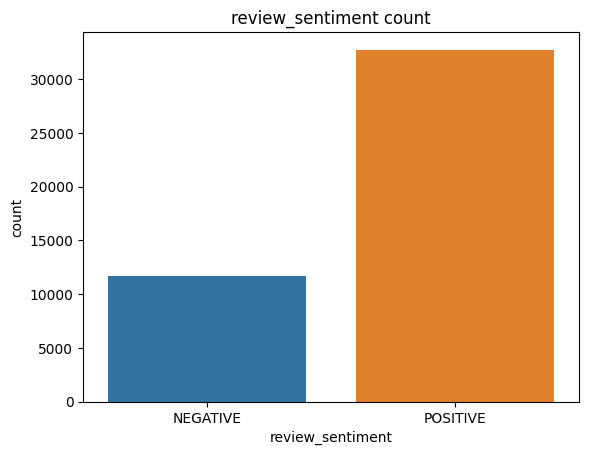

In [ ]:
plt.title("review_sentiment count")
sns.countplot(x = "review_sentiment" , data = df)
plt.show()

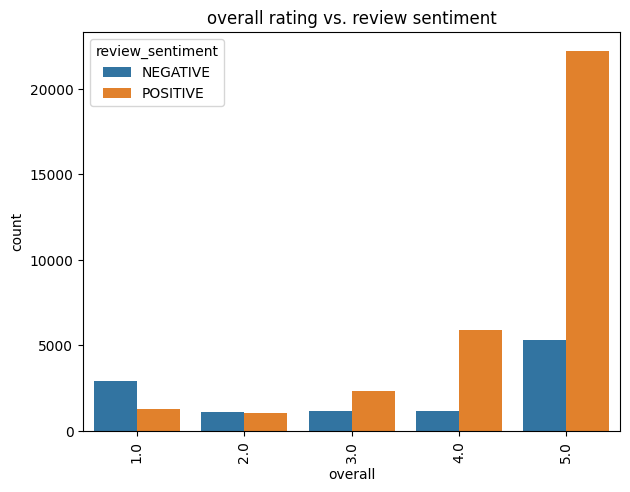

In [ ]:
plt.figure()
sns.countplot(data=df,x=df["overall"],hue=df["review_sentiment"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("overall rating vs. review sentiment")
plt.show()

In [ ]:
# top 10 brand having more count of reviews
df['brand'].value_counts()[:10]

Samsung       8924
BLU           7234
LG            3965
Apple         3610
Nokia         3509
BlackBerry    3168
Motorola      3010
HTC           1768
Sony          1152
Huawei        1097
Name: brand, dtype: int64

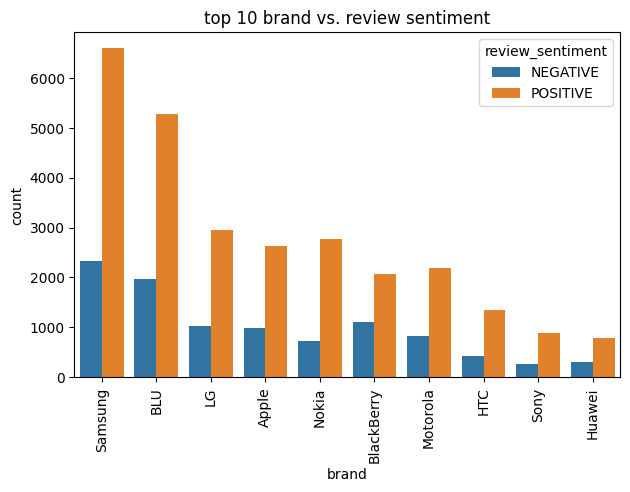

In [ ]:
plt.figure()
sns.countplot(data=df,x=df["brand"],hue=df["review_sentiment"],order=df["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("top 10 brand vs. review sentiment")
plt.show()

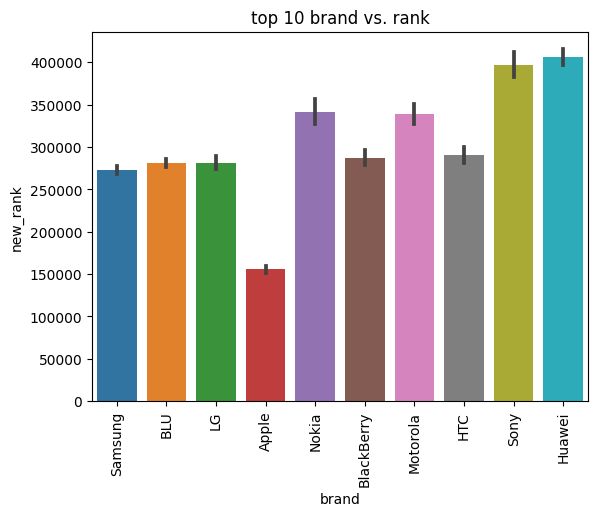

In [ ]:
# Top 10 brands Vs their ranks in cellphone category
plt.figure()
sns.barplot(data=df,x=df["brand"],y=df["new_rank"],order=df["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("top 10 brand vs. rank")
plt.show()

In [ ]:
df["verified"].value_counts()

True     38788
False     5612
Name: verified, dtype: int64

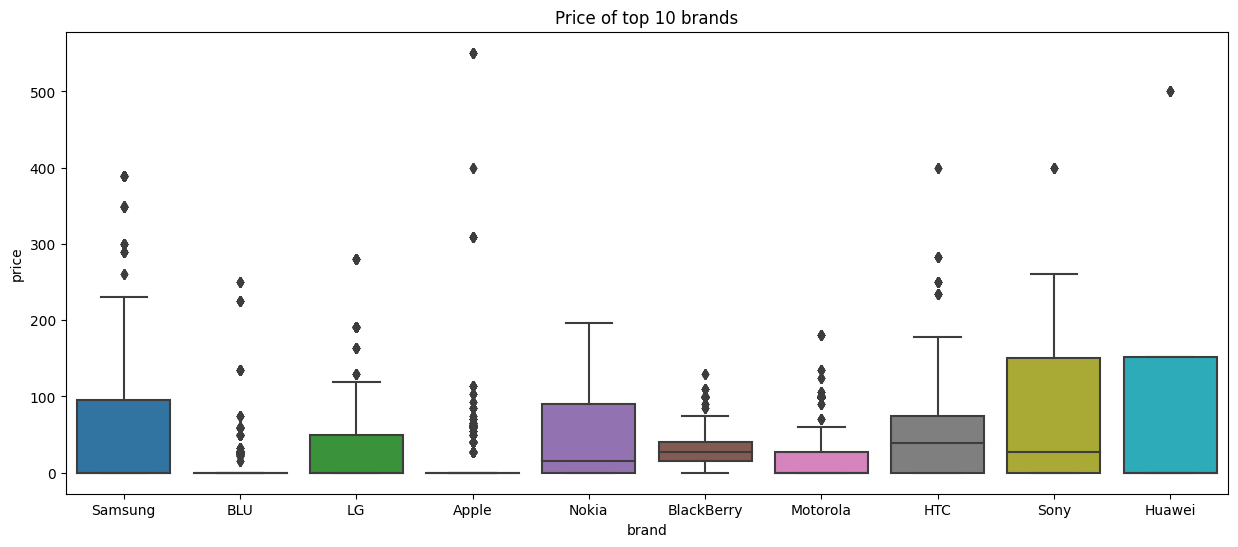

In [ ]:
# Top 10 Brands Prices
plt.figure(figsize=[15,6])
plt.title("Price of top 10 brands")
sns.boxplot(data=df,x="brand",y="price",order=df["brand"].value_counts().iloc[:10].index)
plt.show()

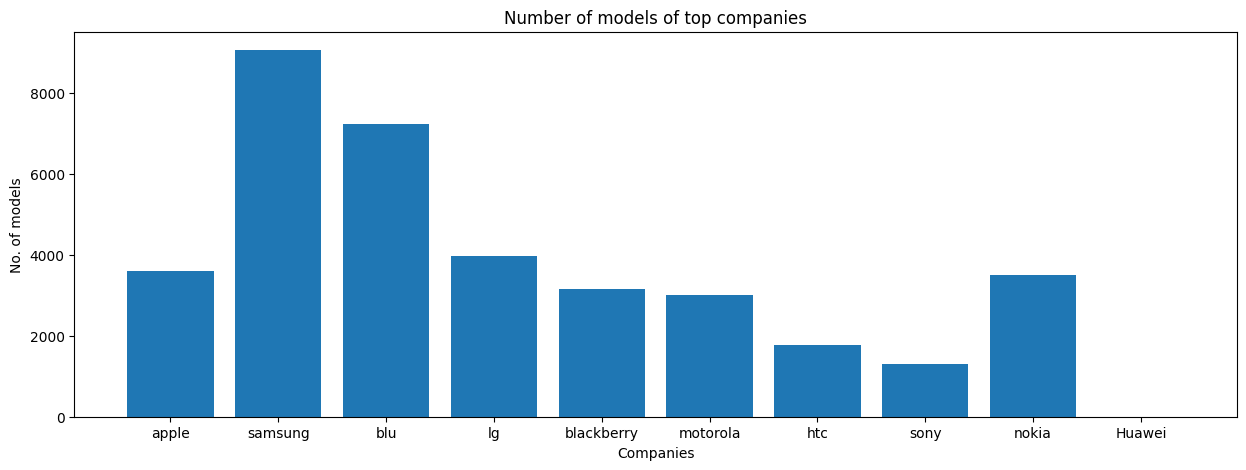

In [ ]:
top_companies=['apple','samsung','blu','lg','blackberry','motorola','htc','sony','nokia','Huawei']
no_of_models=[]
for i in top_companies:
    no_of_models.append(freq[i])


fig = plt.figure(figsize = (15, 5))
plt.bar(top_companies, no_of_models)
plt.xlabel("Companies")
plt.ylabel("No. of models")
plt.title("Number of models of top companies")
plt.show()

### **Text Analytics**

In [ ]:
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')
import nltk
import re
import unicodedata
import string
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")

from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/Web_and_social_media_analytics /stop_words_long.txt')]

In [ ]:
print(stop_words)

['a', 'about', 'above', 'across', 'after', 'again', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'an', 'and', 'another', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'are', 'area', 'areas', 'around', 'as', 'ask', 'asked', 'asking', 'asks', 'at', 'away', 'b', 'back', 'backed', 'backing', 'backs', 'be', 'became', 'because', 'become', 'becomes', 'been', 'before', 'began', 'behind', 'being', 'beings', 'between', 'big', 'both', 'but', 'by', 'c', 'came', 'can', 'case', 'cases', 'certain', 'certainly', 'come', 'could', 'd', 'did', 'differ', 'different', 'differently', 'do', 'does', 'done', 'down', 'down', 'downed', 'downing', 'downs', 'during', 'e', 'each', 'early', 'either', 'end', 'ended', 'ending', 'ends', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'f', 'face', 'faces', 'fact', 'facts', 'far', 'felt', 'few', 'find', 'finds', 'first', 'for', 'four', 'from', 'full', 'fully', 'further', 'furthered', 'furthering'

In [ ]:
# Reading positive words from a text file in to a list
positive_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/Web_and_social_media_analytics /pos_words.txt')]

In [ ]:
# Reading negative words from a text file in to a list
negative_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/Web_and_social_media_analytics /neg_words.txt')]

In [ ]:
df['review_text'].value_counts()

Five Stars excelente                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           489
Five Stars good                                                      

In [ ]:
# function for removing stop words

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocess(document):

    # change sentence to lower case
    document = document.lower()


    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]


    # take only thos words whose length is greater than 2
    words=[w for w in words if len(w)>2]

    # join words to make sentence
    document = " ".join(words)

    return document

In [ ]:
# function to remove positive / negative words from document

def remove_words(document):
   # tokenize into words
    words = word_tokenize(document)

    # remove positive/negative words
    words = [word for word in words if word not in positive_words]
    words = [word for word in words if word not in negative_words]

    document = " ".join(words)

    return document

In [ ]:
# now run lemmatization

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def apply_lemmatization(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]

    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[w for w in words if len(w)>2]

    # join words to make sentence
    document = " ".join(words)

    return document

In [ ]:
def clean_dataframe(df):
  # dropping all NaN values from the column reviewText
  df = df.dropna(axis=0, subset=['review_text'])
  return df

In [ ]:
df=clean_dataframe(df)

In [ ]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct




In [ ]:
df['review_text']=df['review_text'].astype('str')

In [ ]:
# make new dataframe for only reviews and sentiment
df_review=df[["review_text","review_sentiment"]]

In [ ]:
df_review["review_text_nostop"]=[preprocess(x) for x in df_review["review_text"]]

In [ ]:
df_review["review_text_nostop1"]=[remove_words(x) for x in df_review["review_text_nostop"]]

In [ ]:
df_review["review_text_nostop"]

0        bad reception phone ugly heavy terrible user i...
1        pretty good phone improvement v205 samsung v20...
2        not user friendly motorola v300- samsung phone...
3        best phone 've owned europe phones networks be...
4        love phone real problems phone amazingly light...
                               ...                        
61439    stolen metro phone phone stolen not activate t...
61440                                      five stars good
61441    usually great products purchased problems fina...
61442                                 five stars excelente
61443    great budget smartphone great smartphone not e...
Name: review_text_nostop, Length: 44400, dtype: object

In [ ]:
df_review["review_text_nostop1"]

0        reception phone heavy user interface techies d...
1        phone v205 samsung v205 decided try e715 fyi p...
2        user motorola v300- samsung phone measure-up v...
3        phone 've owned europe phones networks samsung...
4        phone real phone light camera phone flashlight...
                               ...                        
61439            metro phone phone activate told comes n't
61440                                           five stars
61441    usually products purchased finally tossed scre...
61442                                 five stars excelente
61443    budget smartphone smartphone entirely move sma...
Name: review_text_nostop1, Length: 44400, dtype: object

In [ ]:
df.head()

,Unnamed: 0,overall,verified,reviewerID,asin,style,reviewerName,unixReviewTime,vote,review_sentiment,...,brand,feature,also_view,details,price,category1,new_rank,review_text,review_sentiment1,rating_class
0,0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Old-and-Wise,1095724800,2.0,NEGATIVE,...,Samsung,[],[],{},0.0,Cell Phones,3059436.0,Bad reception This phone is ugly and heavy and...,Negative,bad
1,1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Sherry Berry,1090627200,15.0,POSITIVE,...,Samsung,[],[],{},0.0,Cell Phones,3059436.0,Pretty good phone.. an improvement from my v20...,Positive,good
2,2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Benjamin David,1089072000,11.0,NEGATIVE,...,Samsung,[],[],{},0.0,Cell Phones,3059436.0,Not as user friendly as the Motorola V300- Thi...,Positive,good
3,3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,{'Package Type:': ' Standard Packaging'},James Beswick,1081728000,4.0,POSITIVE,...,Samsung,[],[],{},0.0,Cell Phones,3059436.0,The best phone I've ever owned ..and I'm from ...,Positive,good
4,4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Kepela,1077148800,12.0,POSITIVE,...,Samsung,[],[],{},0.0,Cell Phones,3059436.0,I love the phone but it has some real problems...,Positive,good


In [ ]:
df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuation)


In [ ]:
# after removing punctuation marks still there are some stop words so running above function to remove remaining stopwords and do lemmatization.
df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]

In [ ]:
df_review["review_text_nostop"]

0        bad reception phone ugly heavy terrible user i...
1        pretty good phone improvement v205 samsung v20...
2        not user friendly motorola v300 samsung phone ...
3        best phone own europe phone network better sam...
4        love phone real problems phone amazingly light...
                               ...                        
61439    steal metro phone phone steal not activate tel...
61440                                       five star good
61441    usually great products purchase problems final...
61442                                  five star excelente
61443    great budget smartphone great smartphone not e...
Name: review_text_nostop, Length: 44400, dtype: object

In [ ]:
df["review_text_nostop"] = df_review["review_text_nostop"]
df.head()

,Unnamed: 0,overall,verified,reviewerID,asin,style,reviewerName,unixReviewTime,vote,review_sentiment,...,feature,also_view,details,price,category1,new_rank,review_text,review_sentiment1,rating_class,review_text_nostop
0,0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Old-and-Wise,1095724800,2.0,NEGATIVE,...,[],[],{},0.0,Cell Phones,3059436.0,Bad reception This phone is ugly and heavy and...,Negative,bad,bad reception phone ugly heavy terrible user i...
1,1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Sherry Berry,1090627200,15.0,POSITIVE,...,[],[],{},0.0,Cell Phones,3059436.0,Pretty good phone.. an improvement from my v20...,Positive,good,pretty good phone improvement v205 samsung v20...
2,2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Benjamin David,1089072000,11.0,NEGATIVE,...,[],[],{},0.0,Cell Phones,3059436.0,Not as user friendly as the Motorola V300- Thi...,Positive,good,not user friendly motorola v300 samsung phone ...
3,3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,{'Package Type:': ' Standard Packaging'},James Beswick,1081728000,4.0,POSITIVE,...,[],[],{},0.0,Cell Phones,3059436.0,The best phone I've ever owned ..and I'm from ...,Positive,good,best phone own europe phone network better sam...
4,4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,{'Package Type:': ' Standard Packaging'},Kepela,1077148800,12.0,POSITIVE,...,[],[],{},0.0,Cell Phones,3059436.0,I love the phone but it has some real problems...,Positive,good,love phone real problems phone amazingly light...


In [ ]:
df.to_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics /final.csv') #creating new .csv for final data


In [ ]:
# divided positive and negative review in different dataframe to create word cloud in tableau
df_all = df_review["review_text_nostop"]
df_positive = df_review[df_review["review_sentiment"]=="POSITIVE"][["review_text_nostop","review_sentiment"]]
df_negative = df_review[df_review["review_sentiment"]=="NEGATIVE"][["review_text_nostop","review_sentiment"]]

In [ ]:
df_all.head()

0    bad reception phone ugly heavy terrible user i...
1    pretty good phone improvement v205 samsung v20...
2    not user friendly motorola v300 samsung phone ...
3    best phone own europe phone network better sam...
4    love phone real problems phone amazingly light...
Name: review_text_nostop, dtype: object

In [ ]:
df_positive.head()

,review_text_nostop,review_sentiment
1,pretty good phone improvement v205 samsung v20...,POSITIVE
3,best phone own europe phone network better sam...,POSITIVE
4,love phone real problems phone amazingly light...,POSITIVE
5,good phone function miss see explosion nice co...,POSITIVE
6,hope phone quit happy motorola phone battery s...,POSITIVE


In [ ]:
df_negative.head()

,review_text_nostop,review_sentiment
0,bad reception phone ugly heavy terrible user i...,NEGATIVE
2,not user friendly motorola v300 samsung phone ...,NEGATIVE
12,gps telenav not work chicago gps work yes wind...,NEGATIVE
13,due respect not forum people express unhappine...,NEGATIVE
21,great phone previously own v400 v525 v600 v710...,NEGATIVE


In [ ]:
# prepare file for wordcloud negative and positive and export these file
neg_sentiment_features= df_negative[["review_text_nostop"]]
pos_sentiment_features= df_positive[["review_text_nostop"]]

In [ ]:
pos_sentiment_features.head()

,review_text_nostop
1,pretty good phone improvement v205 samsung v20...
3,best phone own europe phone network better sam...
4,love phone real problems phone amazingly light...
5,good phone function miss see explosion nice co...
6,hope phone quit happy motorola phone battery s...


In [ ]:
neg_sentiment_features.head()

,review_text_nostop
0,bad reception phone ugly heavy terrible user i...
2,not user friendly motorola v300 samsung phone ...
12,gps telenav not work chicago gps work yes wind...
13,due respect not forum people express unhappine...
21,great phone previously own v400 v525 v600 v710...


In [ ]:
lst_pos= [str(w).split(" ") for w in pos_sentiment_features["review_text_nostop"]]
lst_neg= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]

In [ ]:
#flatten the list
import itertools
merged_pos = list(itertools.chain(*lst_pos))
merged_neg = list(itertools.chain(*lst_neg))

In [ ]:
print(len(merged_pos))
merged_pos

1272004


['pretty',
 'good',
 'phone',
 'improvement',
 'v205',
 'samsung',
 'v205',
 'decide',
 'try',
 'e715',
 'fyi',
 'people',
 'battery',
 'problems',
 'batteries',
 'drain',
 'completely',
 'charge',
 'like',
 'build',
 'battery',
 'life',
 'time',
 'improve',
 'battery',
 'life',
 'immensely',
 'tmobile',
 'customer',
 'stay',
 'customer',
 'service',
 'great',
 'rate',
 'plan',
 'work',
 'great',
 'additional',
 'feature',
 'v205',
 'little',
 'gadget',
 'caller',
 'pics',
 'able',
 'external',
 'display',
 'flip',
 'person',
 'camera',
 'flash',
 'well',
 'zoom',
 'able',
 'picture',
 'gray',
 'black',
 'white',
 'negative',
 'sepia',
 'sketch',
 'multishot',
 'well',
 'lot',
 'frame',
 'picture',
 'download',
 'game',
 'e715',
 'whereas',
 'not',
 'v205',
 'furthermore',
 'game',
 'actually',
 'java',
 'e715',
 'flash',
 'serve',
 'flashlight',
 'useful',
 'sometimes',
 'walk',
 'light',
 'pretty',
 'bright',
 'voice',
 'memo',
 'nuf',
 'otherwise',
 'usual',
 'feature',
 'alarm',
 '

In [ ]:
print(len(merged_neg))
merged_neg

202091


['bad',
 'reception',
 'phone',
 'ugly',
 'heavy',
 'terrible',
 'user',
 'interface',
 'techies',
 'like',
 'drop',
 'call',
 'like',
 'crazy',
 'manhattan',
 'moto',
 'v600',
 'better',
 'phone',
 'take',
 'better',
 'picture',
 'better',
 'clarity',
 'reception',
 'cheaper',
 'moto',
 'v600',
 'tmobile',
 'stay',
 'ugly',
 'monster',
 'not',
 'user',
 'friendly',
 'motorola',
 'v300',
 'samsung',
 'phone',
 'not',
 'measureup',
 'v300',
 'tmobile',
 'customer',
 'finally',
 'feed',
 'v300',
 'terrible',
 'camera',
 'tmobile',
 'send',
 'upgrade',
 'good',
 'feature',
 'phone',
 'external',
 'antenna',
 'brake',
 'camera',
 'take',
 'better',
 'picture',
 'v300',
 'comfortable',
 'bad',
 'phone',
 'sound',
 'quality',
 'call',
 'receiver',
 'tinny',
 'sound',
 'digital',
 'unlike',
 'v300',
 'not',
 'realize',
 'good',
 'receive',
 'phone',
 'lack',
 'feature',
 'maybe',
 'spoil',
 'v300',
 'phone',
 'not',
 'technology',
 'phone',
 'example',
 'phone',
 'not',
 'easy',
 'datebook',


In [ ]:
df_pos = pd.DataFrame({'col':merged_pos})
df_neg = pd.DataFrame({'col':merged_neg})

In [ ]:
# For Tableau
df_pos.to_csv("/content/gdrive/MyDrive/Web_and_social_media_analytics /pos_sentiment_word.csv")
df_neg.to_csv("/content/gdrive/MyDrive/Web_and_social_media_analytics /neg_sentiment_word.csv")

In [ ]:
df.to_excel("/content/gdrive/MyDrive/Web_and_social_media_analytics /final_tab.xlsx", engine='xlsxwriter') #xslx file for final tableau analysis

# **Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

In [ ]:
all_reviews= [message for message in df_review['review_text_nostop']]

In [ ]:
# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(all_reviews)
print(bow_model)

  (0, 5959)	1
  (0, 26633)	2
  (0, 24368)	2
  (0, 33263)	2
  (0, 16012)	1
  (0, 31859)	1
  (0, 34074)	1
  (0, 17707)	1
  (0, 31648)	1
  (0, 19271)	2
  (0, 11545)	1
  (0, 7625)	1
  (0, 9722)	1
  (0, 20054)	1
  (0, 21291)	2
  (0, 34205)	2
  (0, 6447)	3
  (0, 31477)	1
  (0, 24602)	1
  (0, 8472)	1
  (0, 8217)	1
  (0, 32405)	1
  (0, 30563)	1
  (0, 21182)	1
  (1, 24368)	3
  :	:
  (44399, 19681)	1
  (44399, 10715)	1
  (44399, 10787)	2
  (44399, 13442)	1
  (44399, 8517)	1
  (44399, 22640)	1
  (44399, 10736)	1
  (44399, 29703)	1
  (44399, 29699)	4
  (44399, 23288)	1
  (44399, 18973)	2
  (44399, 22563)	1
  (44399, 8214)	1
  (44399, 15795)	2
  (44399, 12348)	1
  (44399, 18936)	1
  (44399, 7293)	1
  (44399, 22603)	1
  (44399, 4296)	1
  (44399, 9278)	1
  (44399, 18942)	1
  (44399, 30587)	1
  (44399, 6689)	1
  (44399, 23803)	1
  (44399, 14534)	2


In [ ]:
#printing the feature names
print(bow_model.shape)
print(vectorizer.get_feature_names_out())

(44400, 36469)
['000' '0000' '000000' ... 'zybcom' 'zynga' 'zyxel']


In [ ]:
#printing the vocabulary
vectorizer.vocabulary_

{'bad': 5959,
 'reception': 26633,
 'phone': 24368,
 'ugly': 33263,
 'heavy': 16012,
 'terrible': 31859,
 'user': 34074,
 'interface': 17707,
 'techies': 31648,
 'like': 19271,
 'drop': 11545,
 'call': 7625,
 'crazy': 9722,
 'manhattan': 20054,
 'moto': 21291,
 'v600': 34205,
 'better': 6447,
 'take': 31477,
 'picture': 24602,
 'clarity': 8472,
 'cheaper': 8217,
 'tmobile': 32405,
 'stay': 30563,
 'monster': 21182,
 'pretty': 25458,
 'good': 15023,
 'improvement': 17136,
 'v205': 34171,
 'samsung': 28115,
 'decide': 10360,
 'try': 33001,
 'e715': 11761,
 'fyi': 14474,
 'people': 24123,
 'battery': 6152,
 'problems': 25612,
 'batteries': 6149,
 'drain': 11477,
 'completely': 8974,
 'charge': 8168,
 'build': 7338,
 'life': 19204,
 'time': 32302,
 'improve': 17134,
 'immensely': 17050,
 'customer': 9977,
 'service': 28825,
 'great': 15316,
 'rate': 26410,
 'plan': 24752,
 'work': 35739,
 'additional': 4134,
 'feature': 13393,
 'little': 19396,
 'gadget': 14520,
 'caller': 7633,
 'pics': 2

In [ ]:
all_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [ ]:
all_vocabular

,0
bad,5959
reception,26633
phone,24368
ugly,33263
heavy,16012
...,...
deservedly,10673
sonyandroid,30037
carrierbranded,7895
undermarketed,33472


 **Bag of words for Positive Sentiment**

In [ ]:
positive_reviews= [message for message in pos_sentiment_features['review_text_nostop']]

In [ ]:
# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(positive_reviews)
print(bow_model)

  (0, 22828)	5
  (0, 13473)	2
  (0, 21856)	3
  (0, 15369)	1
  (0, 30609)	4
  (0, 25140)	1
  (0, 9368)	1
  (0, 29576)	1
  (0, 10599)	3
  (0, 12990)	1
  (0, 21643)	1
  (0, 5608)	3
  (0, 22969)	2
  (0, 5606)	1
  (0, 10342)	1
  (0, 8142)	1
  (0, 7416)	1
  (0, 17302)	2
  (0, 6662)	1
  (0, 17239)	2
  (0, 28948)	2
  (0, 15367)	1
  (0, 15291)	1
  (0, 29039)	1
  (0, 9029)	2
  :	:
  (32740, 17666)	1
  (32740, 9664)	1
  (32740, 9726)	2
  (32740, 12052)	1
  (32740, 7732)	1
  (32740, 20333)	1
  (32740, 9682)	1
  (32740, 26587)	1
  (32740, 26583)	4
  (32740, 20907)	1
  (32740, 17026)	2
  (32740, 20263)	1
  (32740, 7458)	1
  (32740, 14164)	2
  (32740, 11120)	1
  (32740, 16990)	1
  (32740, 20299)	1
  (32740, 3936)	1
  (32740, 8398)	1
  (32740, 16996)	1
  (32740, 6625)	1
  (32740, 6089)	1
  (32740, 13038)	2
  (32740, 21372)	1
  (32740, 27400)	1


In [ ]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names_out())

,000,0000,000000,00001,00002,0002,001,002,00204,002mbps,...,ztez990,zuk,zumocast,zune,zunehd,zunes,zunexbox,zybcom,zynga,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#printing the feature names
print(bow_model.shape)
print(vectorizer.get_feature_names_out())

(32741, 32671)
['000' '0000' '000000' ... 'zybcom' 'zynga' 'zyxel']


In [ ]:
#printing the vocabulary
vectorizer.vocabulary_

{'pretty': 22828,
 'good': 13473,
 'phone': 21856,
 'improvement': 15369,
 'v205': 30609,
 'samsung': 25140,
 'decide': 9368,
 'try': 29576,
 'e715': 10599,
 'fyi': 12990,
 'people': 21643,
 'battery': 5608,
 'problems': 22969,
 'batteries': 5606,
 'drain': 10342,
 'completely': 8142,
 'charge': 7416,
 'like': 17302,
 'build': 6662,
 'life': 17239,
 'time': 28948,
 'improve': 15367,
 'immensely': 15291,
 'tmobile': 29039,
 'customer': 9029,
 'stay': 27379,
 'service': 25772,
 'great': 13734,
 'rate': 23652,
 'plan': 22201,
 'work': 32031,
 'additional': 3787,
 'feature': 12005,
 'little': 17413,
 'gadget': 13025,
 'caller': 6920,
 'pics': 22066,
 'able': 3522,
 'external': 11687,
 'display': 10043,
 'flip': 12408,
 'person': 21758,
 'camera': 6965,
 'flash': 12339,
 'well': 31549,
 'zoom': 32643,
 'picture': 22074,
 'gray': 13723,
 'black': 6015,
 'white': 31693,
 'negative': 19715,
 'sepia': 25732,
 'sketch': 26340,
 'multishot': 19344,
 'lot': 17615,
 'frame': 12683,
 'download': 102

In [ ]:
pos_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [ ]:
#pos_vocabular
pos_vocabular

,0
pretty,22828
good,13473
phone,21856
improvement,15369
v205,30609
...,...
deservedly,9625
sonyandroid,26891
carrierbranded,7162
undermarketed,30003


**Bag of words for Negative Sentiment**

In [ ]:
negative_reviews= [message for message in neg_sentiment_features['review_text_nostop']]

In [ ]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(negative_reviews)
print(bow_model)

  (0, 1486)	1
  (0, 8741)	2
  (0, 7959)	2
  (0, 11089)	2
  (0, 5177)	1
  (0, 10609)	1
  (0, 11354)	1
  (0, 5776)	1
  (0, 10513)	1
  (0, 6254)	2
  (0, 3566)	1
  (0, 2085)	1
  (0, 2846)	1
  (0, 6551)	1
  (0, 6964)	2
  (0, 11398)	2
  (0, 1668)	3
  (0, 10452)	1
  (0, 8005)	1
  (0, 2351)	1
  (0, 2251)	1
  (0, 10798)	1
  (0, 10145)	1
  (0, 6929)	1
  (1, 1486)	1
  :	:
  (11654, 4896)	1
  (11654, 4036)	1
  (11655, 10122)	1
  (11655, 5885)	1
  (11655, 9123)	1
  (11656, 7959)	2
  (11656, 7328)	2
  (11656, 9838)	1
  (11656, 10293)	1
  (11656, 9683)	1
  (11656, 6379)	1
  (11656, 4554)	1
  (11656, 10295)	1
  (11656, 8719)	1
  (11657, 7959)	2
  (11657, 7328)	1
  (11657, 2459)	1
  (11657, 10572)	1
  (11657, 870)	1
  (11657, 10151)	3
  (11657, 1246)	1
  (11657, 6727)	1
  (11658, 4391)	1
  (11658, 10122)	1
  (11658, 4036)	1


In [ ]:
#printing the feature names
neg_words=vectorizer.get_feature_names_out ()
print(len(vectorizer.get_feature_names_out ()))
print(vectorizer.get_feature_names_out ())

12068
['000' '00213641867439426' '00238387225710629' ... 'zune' 'zut' 'zxcvbnm']


In [ ]:
#print the vocabulary
vectorizer.vocabulary_

{'bad': 1486,
 'reception': 8741,
 'phone': 7959,
 'ugly': 11089,
 'heavy': 5177,
 'terrible': 10609,
 'user': 11354,
 'interface': 5776,
 'techies': 10513,
 'like': 6254,
 'drop': 3566,
 'call': 2085,
 'crazy': 2846,
 'manhattan': 6551,
 'moto': 6964,
 'v600': 11398,
 'better': 1668,
 'take': 10452,
 'picture': 8005,
 'clarity': 2351,
 'cheaper': 2251,
 'tmobile': 10798,
 'stay': 10145,
 'monster': 6929,
 'not': 7328,
 'friendly': 4573,
 'motorola': 6974,
 'v300': 11390,
 'samsung': 9332,
 'measureup': 6634,
 'customer': 2926,
 'finally': 4350,
 'feed': 4304,
 'camera': 2098,
 'send': 9528,
 'upgrade': 11302,
 'good': 4847,
 'feature': 4293,
 'external': 4177,
 'antenna': 1177,
 'brake': 1880,
 'comfortable': 2466,
 'sound': 9992,
 'quality': 8557,
 'receiver': 8735,
 'tinny': 10775,
 'digital': 3310,
 'unlike': 11199,
 'realize': 8699,
 'receive': 8733,
 'lack': 6088,
 'maybe': 6613,
 'spoil': 10061,
 'technology': 10523,
 'example': 4021,
 'easy': 3672,
 'datebook': 3001,
 'set': 95

In [ ]:
neg_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [ ]:
neg_vocabular

,0
bad,1486
reception,8741
phone,7959
ugly,11089
heavy,5177
...,...
cnworld,2416
mobo,6880
nonofficial,7287
nonfunctioning,7280


In [ ]:
# Most repeated words in reviews
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 10,
    max_words = 2000,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (8.5, 8.5))
    plt.axis("on")
    if title:
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.35)
    plt.imshow(wordcloud)
    plt.show()

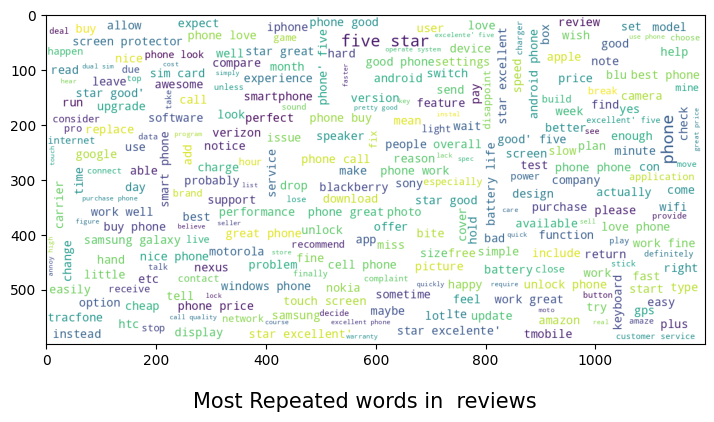

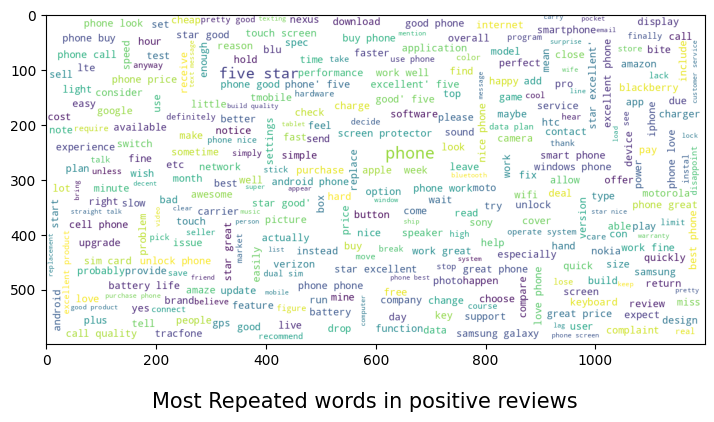

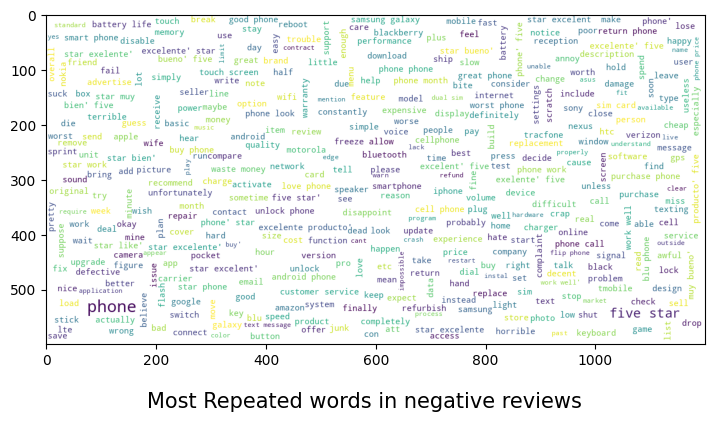

In [ ]:
# Generating wordcloud based on category
word_cloud(all_reviews, "Most Repeated words in  reviews")
word_cloud(positive_reviews, "Most Repeated words in positive reviews")
word_cloud(negative_reviews, "Most Repeated words in negative reviews")